<a href="https://colab.research.google.com/github/iam-pattan/Exploring-ML/blob/main/Hyperparam_tune(sk_opt).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-optimize

     |████████████████████████████████| 102kB 4.9MB/s 


In [ ]:
from skopt import BayesSearchCV
from sklearn.datasets import load_digits, load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
# Load MNIST data
X, y = load_digits(n_class=10, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=.25, random_state=0)

In [ ]:
# log-uniform: understand as search over p = exp(x) by varying x
opt = BayesSearchCV(
    SVC(),
    {
        'C': (1e-6, 1e+6, 'log-uniform'),
        'gamma': (1e-6, 1e+1, 'log-uniform'),
        'degree': (1, 8),  # integer valued parameter
        'kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
    },
    n_iter=32,
    cv=3
)

opt.fit(X_train, y_train)

BayesSearchCV(cv=3, error_score='raise',
              estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                            class_weight=None, coef0=0.0,
                            decision_function_shape='ovr', degree=3,
                            gamma='scale', kernel='rbf', max_iter=-1,
                            probability=False, random_state=None,
                            shrinking=True, tol=0.001, verbose=False),
              fit_params=None, iid=True, n_iter=32, n_jobs=1, n_points=1,
              optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
              refit=True, return_train_score=False, scoring=None,
              search_spaces={'C': (1e-06, 1000000.0, 'log-uniform'),
                             'degree': (1, 8),
                             'gamma': (1e-06, 10.0, 'log-uniform'),
                             'kernel': ['linear', 'poly', 'rbf']},
              verbose=0)

In [ ]:
print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))

val. score: 0.985894580549369
test score: 0.9822222222222222


## total number of iterations it will take to explore all subspaces

In [ ]:
X, y = load_iris(True)

searchcv = BayesSearchCV(
    SVC(),
    search_spaces=[
        ({'C': (0.1, 1.0)}, 19),  # 19 iterations for this subspace
        {'gamma':(0.1, 1.0)}
    ],
    n_iter=23
)

print(searchcv.total_iterations)

42


## Choosing best params

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_objective, plot_histogram

from sklearn.datasets import load_digits
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
X, y = load_digits(n_class=10, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# pipeline class is used as estimator to enable
# search over different model types
pipe = Pipeline([
    ('model', SVC())
])

# single categorical value of 'model' parameter is
# sets the model class
# We will get ConvergenceWarnings because the problem is not well-conditioned.
# But that's fine, this is just an example.
linsvc_search = {
    'model': [LinearSVC(max_iter=1000)],
    'model__C': (1e-6, 1e+6, 'log-uniform'),
}

# explicit dimension classes can be specified like this
svc_search = {
    'model': Categorical([SVC()]),
    'model__C': Real(1e-6, 1e+6, prior='log-uniform'),
    'model__gamma': Real(1e-6, 1e+1, prior='log-uniform'),
    'model__degree': Integer(1,8),
    'model__kernel': Categorical(['linear', 'poly', 'rbf']),
}

In [ ]:
opt = BayesSearchCV(
    pipe,
    # (parameter space, # of evaluations)
    [(svc_search, 40), (linsvc_search, 16)],
    cv=3
)

opt.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

BayesSearchCV(cv=3, error_score='raise',
              estimator=Pipeline(memory=None,
                                 steps=[('model',
                                         SVC(C=1.0, break_ties=False,
                                             cache_size=200, class_weight=None,
                                             coef0=0.0,
                                             decision_function_shape='ovr',
                                             degree=3, gamma='scale',
                                             kernel='rbf', max_iter=-1,
                                             probability=False,
                                             random_state=None, shrinking=True,
                                             tol=0.001, verbose=False))],
                                 verbose=False),
              fit_params=None, iid=Tru...
                               'model__gamma': Real(low=1e-06, high=10.0, prior='log-uniform', transform='identity'),
            

In [ ]:
print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))
print("best params: %s" % str(opt.best_params_))

val. score: 0.9888641425389755
test score: 0.9911111111111112
best params: OrderedDict([('model', SVC(C=8235.040646893849, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.00030036491272457275, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)), ('model__C', 8235.040646893849), ('model__degree', 3), ('model__gamma', 0.00030036491272457275), ('model__kernel', 'rbf')])


## Trailer: ionosphere dataset 

In [ ]:
# automatic svm hyperparameter tuning using skopt for the ionosphere dataset
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
dataframe = read_csv(url, header=None)
# split into input and output elements
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)
# define search space
params = dict()
params['C'] = (1e-6, 100.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['degree'] = (1,5)
params['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the search
search = BayesSearchCV(estimator=SVC(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X, y)
# report the best result
print(search.best_score_)
print(search.best_params_)

(351, 34) (351,)
0.949667616334283
OrderedDict([('C', 1.3471211979684299), ('degree', 4), ('gamma', 0.13976828279385584), ('kernel', 'rbf')])


# Apna Time ~~Aayega~~ Aagaya 😉



In [ ]:
import matplotlib.pyplot as plt
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Construct a tf.data.Dataset
data, meta = tfds.load('beans', 
                      as_supervised=True,
                      with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteNUK9H9/beans-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteNUK9H9/beans-validation.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteNUK9H9/beans-test.tfrecord


Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


In [ ]:
raw_train = data['train']
raw_val = data['validation']
raw_test = data['test']

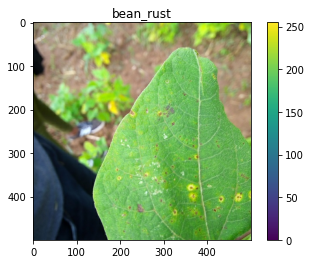

In [ ]:
label_extractor = meta.features['label'].int2str
for image,label in raw_train.take(1):
  plt.imshow(image)
  plt.title(label_extractor(label))
  plt.colorbar()
  plt.show()

In [ ]:
print(image.shape)
min(image.numpy().ravel()), max(image.numpy().ravel()) 

(500, 500, 3)


(0, 255)

In [ ]:
def scale_image(img, label):
    img = tf.cast(img,tf.float32)
    img = img/255.0
    img = tf.image.resize(img, (331,331))
    return img, label 

In [ ]:
train = raw_train.map(scale_image)
val = raw_val.map(scale_image)
test = raw_test.map(scale_image) 

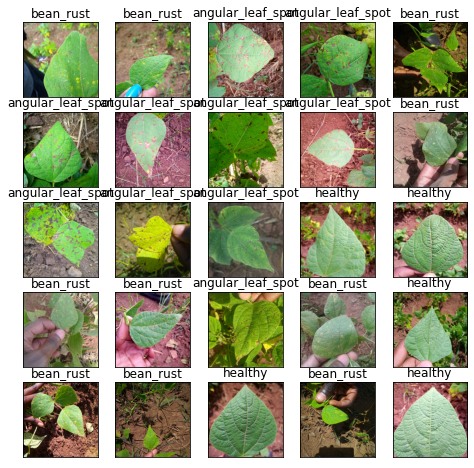

In [ ]:
plt.figure(figsize=(8,8))
i=1
for img, label in train.take(25):
    plt.subplot(5,5,i)
    plt.imshow(img)
    plt.title(label_extractor(label))
    plt.xticks([])
    plt.yticks([])
    i += 1
plt.show() 

In [ ]:
batch_size = 64
train_batches = train.batch(batch_size)
val_batches = val.batch(batch_size)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16, 3, padding='valid', kernel_initializer='HeNormal', activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='elu'),
  tf.keras.layers.Dense(3, activation='softmax'),
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [ ]:
model.fit(train_batches, validation_data=val_batches, epochs=3, callbacks=callback)

Epoch 1/3
17/17 [==============================] - 113s 6s/step - loss: 1.3120 - accuracy: 0.3366 - val_loss: 1.3283 - val_accuracy: 0.3308
Epoch 2/3
17/17 [==============================] - 104s 6s/step - loss: 1.3250 - accuracy: 0.3337 - val_loss: 1.3283 - val_accuracy: 0.3308
Epoch 3/3
17/17 [==============================] - 104s 6s/step - loss: 1.3250 - accuracy: 0.3337 - val_loss: 1.3283 - val_accuracy: 0.3308


### Abb hum karte hein Bayes optim on chotusa dataset

In [51]:
import numpy as np
from tensorflow.keras  import datasets
(x_train, y_train),(x_test, y_test) = datasets.cifar10.load_data()
x_train , x_test= x_train/255.0 , x_test/255.0

170500096/170498071 [==============================] - 4s 0us/step


In [21]:
def build_model(n_hidden=1, filters=16, act='relu', n_neurons=64, drop=0.2):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(16, 3, padding='valid', kernel_initializer='HeNormal', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
  model.add(tf.keras.layers.Dropout(0.2))
  
  for layer in range(n_hidden):
    model.add(tf.keras.layers.Conv2D(filters, 3, activation=act))
    model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
    model.add(tf.keras.layers.Dropout(drop))

  # model.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
  # model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
  # model.add(tf.keras.layers.Dropout(0.2))
  # model.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
  # model.add(tf.keras.layers.MaxPooling2D((2, 2), padding='same'))
  # model.add(tf.keras.layers.Flatten())
  
  for layer in range(n_hidden):
    model.add(tf.keras.layers.Dense(n_neurons, activation='elu'))
  
  model.add(tf.keras.layers.Dense(3, activation='softmax'))
  model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
  return model

In [49]:
keras_clf = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model, epochs=10, callbacks=callback)

In [59]:
keras_param_space = {"n_hidden": [1, 2, 3, 4],
                     "filter": [16,32,64],
                     "act": ['elu', 'leaky_relu(0.1)'],
                     "n_neurons": [32, 64, 128, 256],
                     "drp": np.arange(0.2,0.7) 
}

keras_rand_search = BayesSearchCV(keras_clf, 
                                 keras_param_space, 
                                #  n_iter=20, 
                                 cv=5, 
                                 scoring="accuracy", 
                                 n_jobs=-1, verbose=True)

keras_rand_search.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


TypeError: ignored

#### Ayee...hyeeee.....abhi bhi nahi chal raha ye. Isko memory ki bahot bhook hai 🤖. 
Kabhi phir yaha pe chalang lagate hein 